# データ解析（EDA）

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)


In [27]:
train_df = pd.read_csv("../input/gala-images-classification/dataset/train.csv")

In [28]:
train_df.head()

,Image,Class
0,image4.jpg,Attire
1,image7.jpg,misc
2,image10.jpg,Food
3,image11.jpg,Decorationandsignage
4,image13.jpg,Decorationandsignage


<AxesSubplot:xlabel='Class', ylabel='count'>

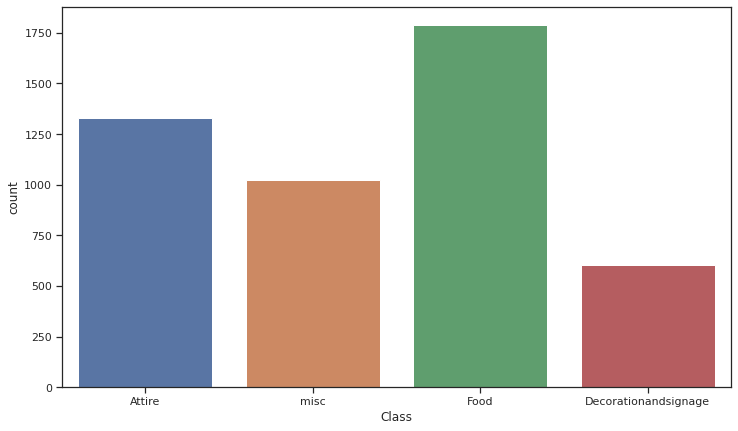

In [29]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.countplot(x="Class", data=train_df, ax=ax)

In [30]:
train_df.value_counts("Class")

Class
Food                    1789
Attire                  1329
misc                    1024
Decorationandsignage     603
dtype: int64

## train と test の image のサイズを求める

In [31]:
import cv2
def get_img(path):
    """
    pathからimageの配列を得る
    """
    im_bgr = cv2.imread(path)
    im_rgb = im_bgr[:, :, ::-1]
    #print(im_rgb)
    return im_rgb
def get_img_size(path):
    im_rgb = get_img(path)
    return (im_rgb.shape[0], im_rgb.shape[1])

In [78]:
import os

height = []
width = []
files = []
file_name = []

for dirname, _, filenames in os.walk('../input/gala-images-classification/dataset/Train_Images'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        h,w = get_img_size(path)
        height.append(h)
        width.append(w)
        files.append(path)
        file_name.append(filename)

for dirname, _, filenames in os.walk('../input/gala-images-classification/dataset/Test_Images'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        h,w = get_img_size(path)
        height.append(h)
        width.append(w)
        files.append(path)
        file_name.append(filename)

In [79]:
image_size_df = pd.DataFrame({"height":height,"width":width, "path":files,"file_name":file_name})

In [80]:
image_size_df.describe()

,height,width
count,5984.000000,5984.0
mean,73.862299,80.0
std,26.087917,0.0
min,20.000000,80.0
25%,53.000000,80.0
50%,60.000000,80.0
75%,90.000000,80.0
max,235.000000,80.0


image3343.jpg
              Image Class
1548  image3343.jpg  Food


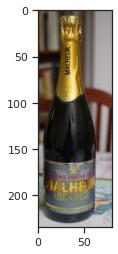

In [81]:
import matplotlib.pyplot as plt
path = image_size_df.query("height==235")["path"].values[0]
file_name = image_size_df.query("height==235")["file_name"].values[0]
row = train_df.query("Image==@file_name")
print(file_name)
print(row)
img = get_img(path)
plt.imshow(img)
plt.show()

'../input/gala-images-classification/dataset/Train_Images/image3343.jpg'

,height,width,path
2816,235,80,../input/gala-images-classification/dataset/Tr...
